In [1]:
# import libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# loading data set
datasets.cifar10.load_data()

170498071/170498071 [==============================] - 129s 1us/step


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [3]:
# splitting the dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# check shape of test and train
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

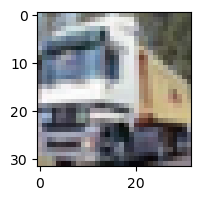

In [4]:
# plot the figure
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

In [5]:
# check shape and content of y_train
y_train.shape, y_train[:5]

((50000, 1),
 array([[6],
        [9],
        [9],
        [4],
        [1]], dtype=uint8))

In [6]:
# reshape y_train
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
# label classes 
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [8]:
# function to plot sample
def plot_sample(X, y, index): 
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


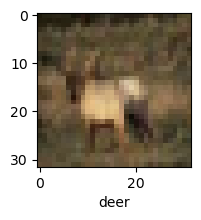

In [9]:
plot_sample(X_train, y_train, 3)


In [10]:
# normalise dataset
X_train =  X_train/255
X_test = X_test/255



In [11]:
# Build simple artificial neural network for image classification
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 74s 47ms/step - loss: 1.8109 - accuracy: 0.3546
Epoch 2/5
1563/1563 [==============================] - 74s 47ms/step - loss: 1.6245 - accuracy: 0.4258
Epoch 3/5
1563/1563 [==============================] - 73s 47ms/step - loss: 1.5419 - accuracy: 0.4571
Epoch 4/5
1563/1563 [==============================] - 73s 47ms/step - loss: 1.4814 - accuracy: 0.4794
Epoch 5/5
1563/1563 [==============================] - 9472s 6s/step - loss: 1.4327 - accuracy: 0.4979


We can see that at the end of 5 epochs, accuracy is at around 49%

In [14]:
# Printing classification report
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 4s 13ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.40      0.51      1000
           1       0.51      0.73      0.60      1000
           2       0.52      0.13      0.21      1000
           3       0.32      0.45      0.37      1000
           4       0.44      0.38      0.41      1000
           5       0.44      0.32      0.37      1000
           6       0.56      0.48      0.51      1000
           7       0.41      0.71      0.52      1000
           8       0.61      0.64      0.62      1000
           9       0.51      0.56      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



In [15]:
# Build CNN model
cnn = models.Sequential([
    
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # dense 
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [16]:
# compile model
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# fit
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 31s 19ms/step - loss: 1.4833 - accuracy: 0.4676
Epoch 2/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1260 - accuracy: 0.6066
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9903 - accuracy: 0.6562
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9069 - accuracy: 0.6827
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8417 - accuracy: 0.7068
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7865 - accuracy: 0.7267
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7361 - accuracy: 0.7420
Epoch 8/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6910 - accuracy: 0.7583
Epoch 9/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6530 - accuracy: 0.7717
Epoch 10/10
1563/1563 [==============================] - 30s 19m

In [18]:
# test
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9529 - accuracy: 0.6942


[0.9529232382774353, 0.6941999793052673]

In [19]:
# reshaping y_test
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

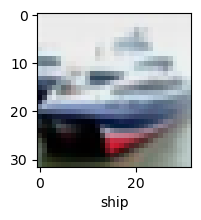

In [20]:
# plot y_test
plot_sample(X_test, y_test, 1)

In [21]:
# predict 
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 8ms/step


array([[5.9341611e-03, 1.6999947e-03, 2.3828412e-03, 6.7265439e-01,
        3.2150841e-05, 1.5288119e-01, 1.1967682e-02, 7.6097516e-05,
        5.1239137e-02, 1.0113238e-01],
       [3.9664400e-03, 7.3162568e-01, 1.2047354e-05, 4.1636449e-06,
        1.4616354e-06, 1.7160586e-07, 9.8415967e-07, 1.1826844e-06,
        2.3781240e-01, 2.6575483e-02],
       [6.9123872e-02, 6.8312627e-01, 9.2876633e-04, 3.9924625e-03,
        8.5226563e-04, 1.1609712e-03, 8.2650041e-04, 5.2119023e-04,
        8.5891753e-02, 1.5357611e-01],
       [6.6056257e-01, 5.1088989e-02, 4.4978005e-03, 2.3815997e-03,
        1.1173501e-02, 7.8843790e-05, 4.2541311e-04, 4.0686221e-04,
        2.6801974e-01, 1.3647153e-03],
       [2.9250630e-06, 1.5133261e-04, 9.2332512e-03, 5.1618338e-02,
        3.4785432e-01, 4.7919042e-03, 5.8478677e-01, 2.0699790e-06,
        1.5583059e-03, 8.6530605e-07]], dtype=float32)

In [22]:
# coverting into y_classes
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 1, 0, 6]

In [23]:
# comparing y_test and y_pred
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

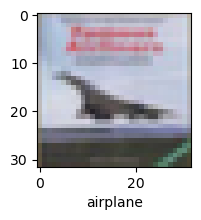

In [24]:
# plotting samples
plot_sample(X_test, y_test, 3)

In [25]:
classes[y_classes[3]]

'airplane'

In [41]:
# Print classification report 
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.76      0.76      1000
           1       0.84      0.78      0.81      1000
           2       0.51      0.66      0.58      1000
           3       0.53      0.48      0.50      1000
           4       0.67      0.59      0.63      1000
           5       0.64      0.59      0.61      1000
           6       0.73      0.78      0.75      1000
           7       0.77      0.72      0.74      1000
           8       0.79      0.82      0.81      1000
           9       0.78      0.80      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

